## Imports

In [1]:
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from itertools import cycle
import torch 

import EWOthello.utils.plot_helpers as plt_utils
from EWOthello.mingpt.probe_model import BatteryProbeClassification
from EWOthello.data.othello import *
from EWOthello.mingpt.dataset import CharDataset 
from EWOthello.mingpt.model import GPT, GPTConfig, GPTforProbing, GPTforProbing_v2


/home/deanhazineh/anaconda3/envs/emergent_world/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## View Training Losses and Accuracy for New Probe Models vs Old Probes

In [2]:
datapath = "../EWOthello/ckpts/DeanKLi_GPT_Synthetic_8L8H/"
all_files = os.listdir(datapath)
new_board_probes = [file for file in all_files if file.startswith("linearProbe_Map_New")]
old_board_probes = [file for file in all_files if file.startswith("linearProbe_Map_old")]
new_board_probes.sort()
old_board_probes.sort()

print(old_board_probes)
print(new_board_probes)

['linearProbe_Map_old_8L8H_GPT_Layer1.ckpt', 'linearProbe_Map_old_8L8H_GPT_Layer1.pickle', 'linearProbe_Map_old_8L8H_GPT_Layer2.ckpt', 'linearProbe_Map_old_8L8H_GPT_Layer2.pickle', 'linearProbe_Map_old_8L8H_GPT_Layer3.ckpt', 'linearProbe_Map_old_8L8H_GPT_Layer3.pickle', 'linearProbe_Map_old_8L8H_GPT_Layer4.ckpt', 'linearProbe_Map_old_8L8H_GPT_Layer4.pickle', 'linearProbe_Map_old_8L8H_GPT_Layer5.ckpt', 'linearProbe_Map_old_8L8H_GPT_Layer5.pickle', 'linearProbe_Map_old_8L8H_GPT_Layer6.ckpt', 'linearProbe_Map_old_8L8H_GPT_Layer6.pickle', 'linearProbe_Map_old_8L8H_GPT_Layer7.ckpt', 'linearProbe_Map_old_8L8H_GPT_Layer7.pickle', 'linearProbe_Map_old_8L8H_GPT_Layer8.ckpt', 'linearProbe_Map_old_8L8H_GPT_Layer8.pickle']
['linearProbe_Map_New_8L8H_GPT_Layer1.ckpt', 'linearProbe_Map_New_8L8H_GPT_Layer1.pickle', 'linearProbe_Map_New_8L8H_GPT_Layer2.ckpt', 'linearProbe_Map_New_8L8H_GPT_Layer2.pickle', 'linearProbe_Map_New_8L8H_GPT_Layer3.ckpt', 'linearProbe_Map_New_8L8H_GPT_Layer3.pickle', 'linearP

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.9084528684616089
0.9485791325569153
0.9712958931922913
0.983389139175415
0.9914080500602722
0.9949354529380798
0.9948280453681946
0.9952107667922974
0.7569003701210022
0.7579218149185181
0.7574235200881958
0.7562752366065979
0.7548604607582092
0.7514254450798035
0.7492013573646545
0.749765157699585


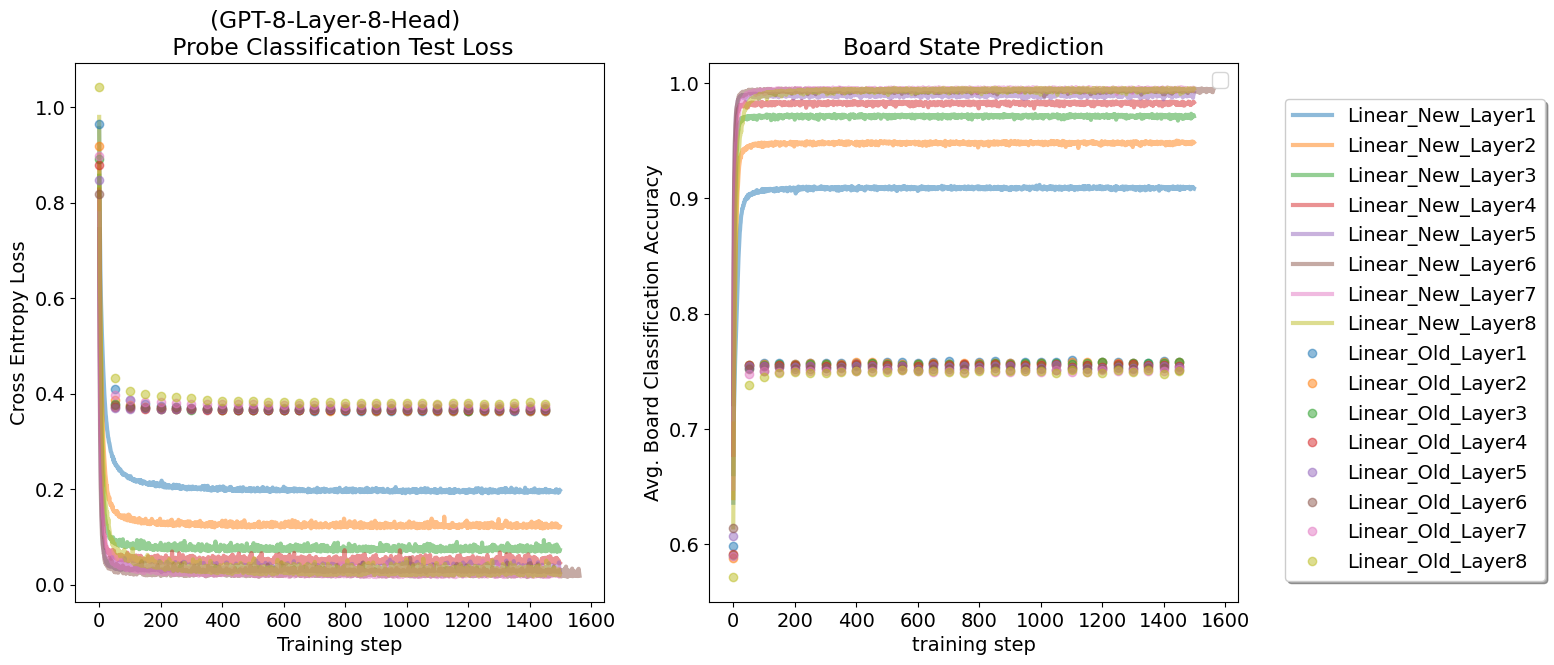

In [5]:
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(15, 7))
ax = plt_utils.addAxis(fig, 1, 2)
colors = cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'])
for filename in new_board_probes:
    if filename.endswith(".pickle"):
        with open(datapath + filename, 'rb') as fhandle:
            data = pickle.load(fhandle)

        training_loss = data["training_loss"][:1563]
        testing_loss = data["testing_loss"][:1563]
        testing_board_acc = data["testing_board_acc"][:1563]
        print(testing_board_acc[-1])
        use_color = next(colors)
        use_label = f"Linear_New_" + filename[-13:-7]
        ax[0].plot(testing_loss, '-', color=use_color, alpha=0.5, linewidth=3, label=use_label)
        ax[1].plot(testing_board_acc, '-', color=use_color, alpha=0.5, linewidth=3)


colors = cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'])
for filename in old_board_probes:
    if filename.endswith(".pickle"):
        with open(datapath + filename, 'rb') as fhandle:
            data = pickle.load(fhandle)

        training_loss = data["training_loss"][:1563]
        testing_loss = data["testing_loss"][:1563]
        testing_board_acc = data["testing_board_acc"][:1563]
        print(testing_board_acc[-1])

        num_elem = len(testing_loss)    
        skip=50
        use_color = next(colors)
        use_label = f"Linear_Old_" + filename[-13:-7]
        #ax[0].plot(training_loss, '*', color=use_color)
        ax[0].plot(np.arange(0,num_elem, skip), testing_loss[::skip], 'o', color=use_color, alpha=0.5, label=use_label)
        ax[1].plot(np.arange(0,num_elem, skip),testing_board_acc[::skip], 'o', color=use_color, alpha=0.5)

ax[0].set_title("(GPT-8-Layer-8-Head) \n Probe Classification Test Loss")
ax[0].set_ylabel("Cross Entropy Loss")
ax[0].set_xlabel("Training step")
ax[1].set_title("Board State Prediction")
ax[1].set_ylabel("Avg. Board Classification Accuracy")
ax[1].set_xlabel("training step")
ax[0].legend(ncol=1, fancybox=True, bbox_to_anchor=(2.8, 0.95), shadow=True)
ax[1].legend()

## View the training losses for linear probes of other GPT Models

In [4]:
datapath = "../EWOthello/ckpts/"
gpt_folders = os.listdir(datapath)
gpt_folders = [fold for fold in gpt_folders if fold.startswith("Dean_GPTv2_Synthetic")]
gpt_folders.sort()
print(gpt_folders)

['Dean_GPTv2_Synthetic_1L1H', 'Dean_GPTv2_Synthetic_1L8H', 'Dean_GPTv2_Synthetic_4L1H', 'Dean_GPTv2_Synthetic_4L8H', 'Dean_GPTv2_Synthetic_8L8H']


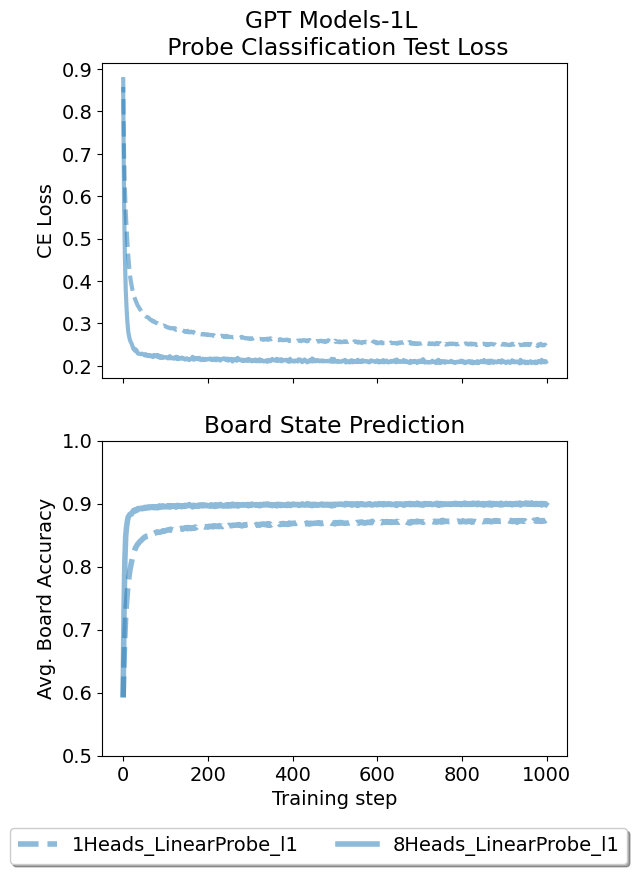

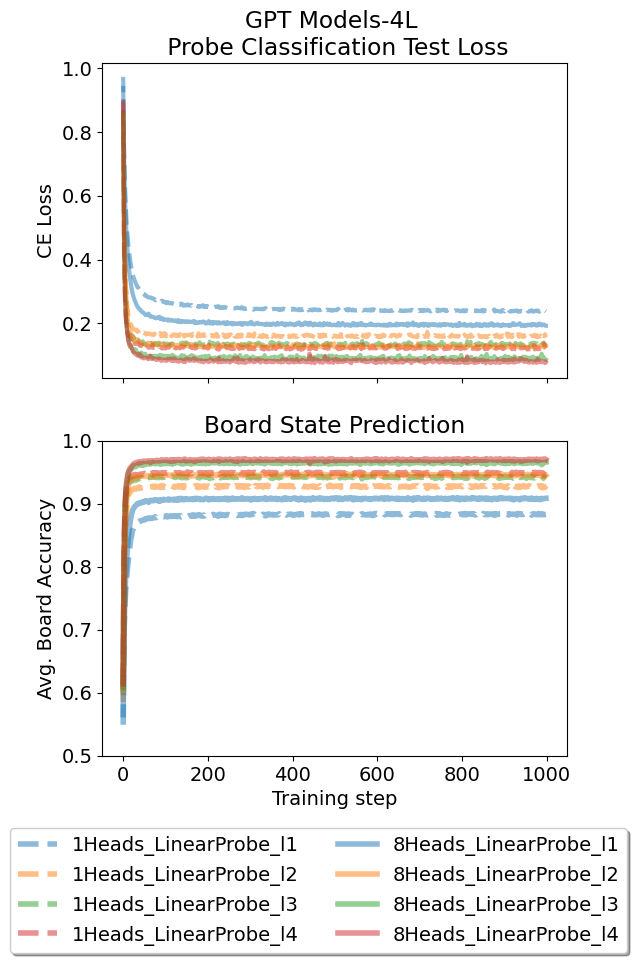

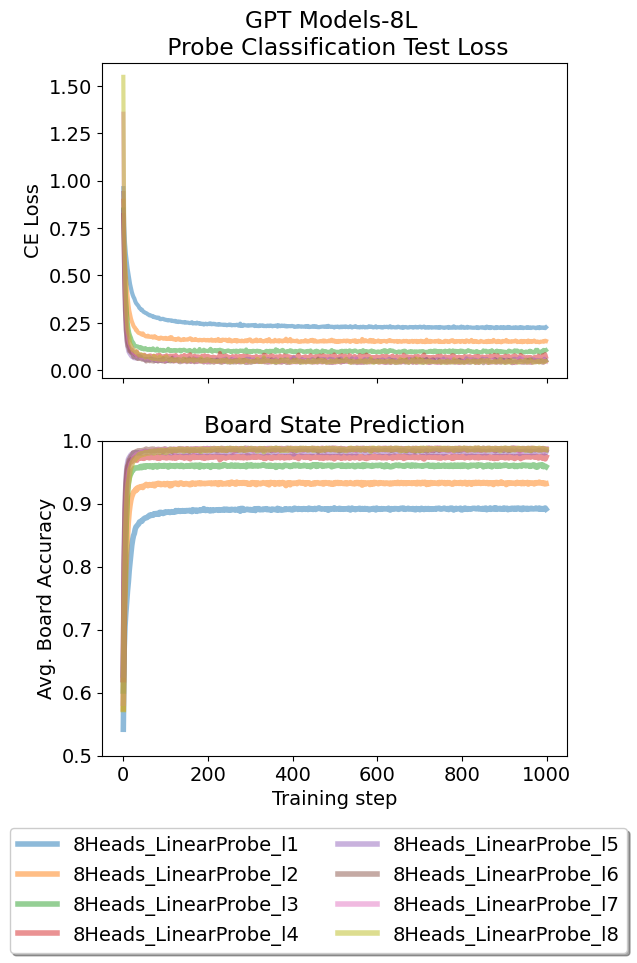

In [5]:
for layer in np.arange(1,9,1):
    fixed_nlayer_models = [fold for fold in gpt_folders if f"{layer}L" in fold]

    if fixed_nlayer_models:
        fig = plt.figure(figsize=(6, 9))
        ax = plt_utils.addAxis(fig, 2, 1)
        marker_type = ["-", "--"]
        
        for i, fold in enumerate(fixed_nlayer_models):
            list_files = os.listdir(datapath + fold + "/")
            probe_files = [file for file in list_files if file.startswith("linearProbe") and file.endswith(".pickle")]
            probe_files.sort()
            colors = cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'])

            for probe_file in probe_files:
                with open(datapath + fold +"/" + probe_file, 'rb') as fhandle:
                    data = pickle.load(fhandle)
                training_loss = data["training_loss"]
                testing_loss = data["testing_loss"]
                testing_board_acc = data["testing_board_acc"]
                
                num_elem, skip = len(testing_loss),2
                use_color = next(colors)
                use_label = f"{probe_file[22:23]}Heads_LinearProbe_l{probe_file[-8:-7]}"
                use_marker = marker_type[1] if "1H" in probe_file else marker_type[0]
                ax[0].plot(np.arange(0, num_elem, skip), testing_loss[::skip], use_marker, color=use_color, alpha=0.5, linewidth=3, label=use_label)
                ax[1].plot(np.arange(0, num_elem, skip), testing_board_acc[::skip], use_marker, color=use_color, alpha=0.5, linewidth=4, label=use_label)
        
        #ax[0].set_xlabel("Training step")
        ax[0].get_xaxis().set_visible("False")
        ax[0].axes.xaxis.set_ticklabels([])
        ax[0].set_ylabel("CE Loss")
        ax[0].set_title(f"GPT Models-{layer}L \n Probe Classification Test Loss")
        ax[1].set_xlabel("Training step")
        ax[1].set_ylabel("Avg. Board Accuracy")
        ax[1].set_ylim([0.5, 1.0])
        ax[1].set_title(f"Board State Prediction")  
        ax[1].legend(ncol=2, fancybox=True, bbox_to_anchor=(1.15, -0.2), shadow=True)


## Visualize the Probe Projections in action

In [6]:
othello = get(ood_num=-1, data_root=None, num_preload=1) # 11 corresponds to over 1 million games
game_dataset = CharDataset(othello) 

Max num files: 230; Use_num: 1
['gen10e5__20220324_165952.pickle']


Mem Used: 0.4313 GB: 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

Deduplicating...


Deduplicating finished with 99999 games left
Using 20 million for training, 0 for validation
Dataset created has 99999 sequences, 61 unique words.


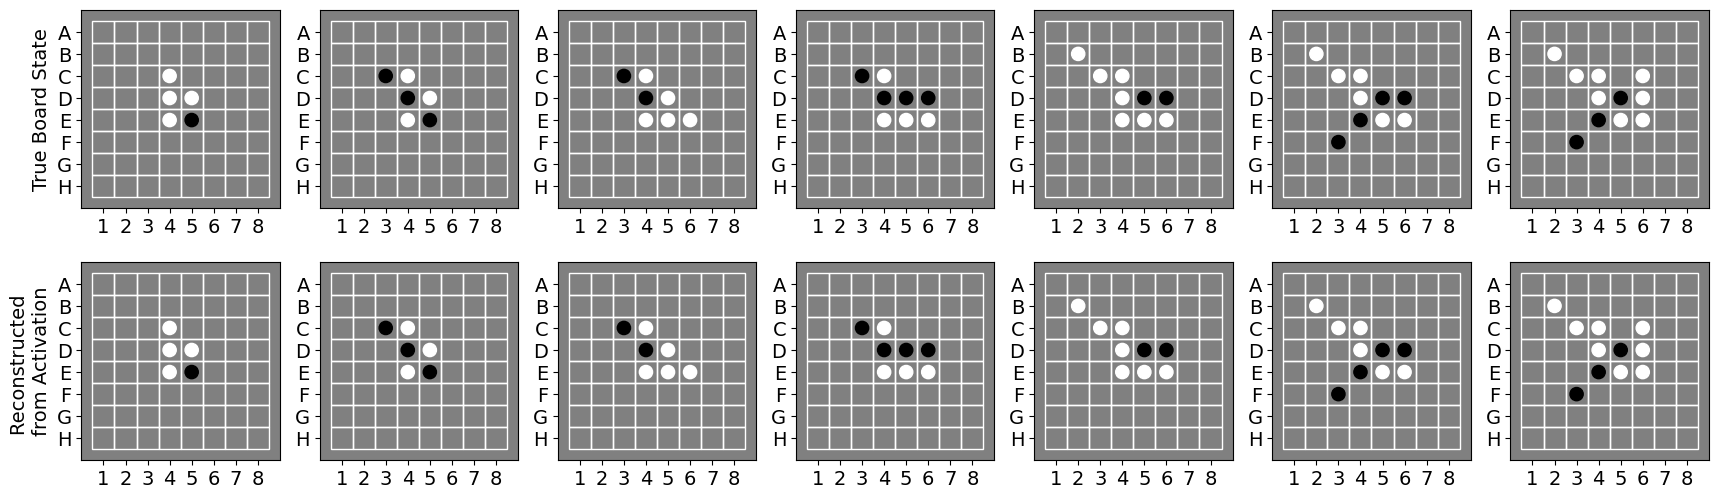

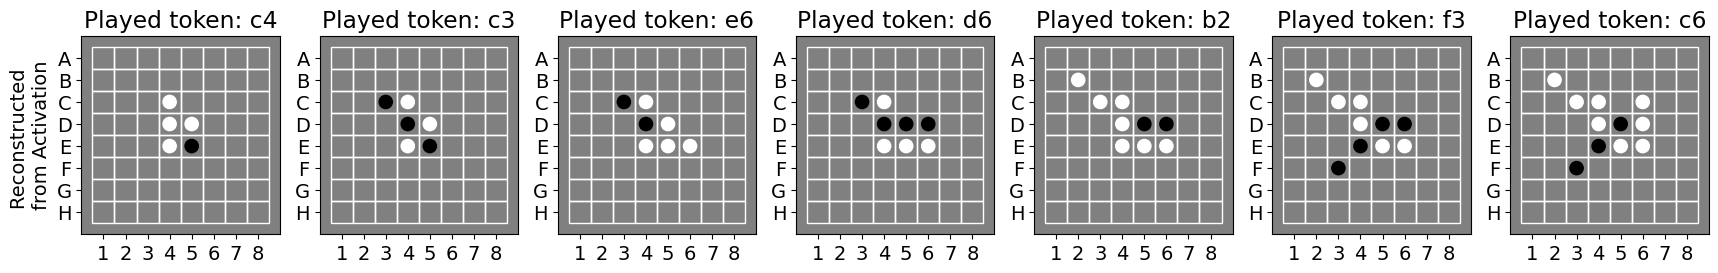

In [34]:
probe_path = "../EWOthello/ckpts/Dean_GPTv2_Synthetic_4L8H/"
probe_layer = 1
index = 5000
x, _ = game_dataset[index]
n_layer = int(probe_path[-5:-4])
n_head = int(probe_path[-3:-2])
mconf = GPTConfig(61, 59, n_layer=n_layer, n_head=n_head, n_embd=512)

# Get GPT Model
GPT_probe = GPTforProbing(mconf, probe_layer)
GPT_probe.load_state_dict(torch.load(probe_path + f"GPT_Synthetic_{n_layer}Layers_{n_head}Heads.ckpt"))
GPT_probe.eval()
device = torch.cuda.current_device()
GPT_probe = GPT_probe.to(device)

# Get the probes
load_proj_ckpt = probe_path + f"linearProbe_Map_New_{n_layer}L{n_head}H_GPT_Layer{probe_layer}.ckpt"
data = torch.load(load_proj_ckpt)
proj_matrix = data["proj.weight"].detach().cpu()
proj_bias = data["proj.bias"].detach().cpu()

# Get a single full-game sequence data from the game_dataset (index=#)
tbf = [game_dataset.itos[_] for _ in x.tolist()]
valid_until = tbf.index(-100) if -100 in tbf else 999
property_modifier = np.concatenate([np.ones((1, 64)) * (-1) ** i for i in range(59)], axis=0)
a = OthelloBoardState()
board_state = np.array(a.get_gt(tbf[:valid_until], "get_state"))

# Get the activation vectors
act = GPT_probe(x[None, :].to(device))[0, :valid_until, :].detach().cpu()
pred_rep = torch.matmul(act, proj_matrix.T) + proj_bias
pred_rep = torch.argmax(pred_rep.reshape(-1, 64, 3), -1, keepdim=False)
pred_board = (pred_rep - 1.0) * property_modifier[:valid_until, :] + 1.0

num_moves = 7
game_moves = plt_utils.seq_to_boardCoord(tbf[:num_moves+1])
fig = plt.figure(figsize=(3*num_moves, 6))
ax = plt_utils.addAxis(fig, 2, num_moves)
for i in range(num_moves):
    plt_utils.plot_game_discs(board_state[i].reshape(8,8), ax[i])
    plt_utils.plot_game_discs(pred_board[i].reshape(8,8), ax[i+num_moves])
ax[0].set_ylabel("True Board State")
ax[num_moves].set_ylabel("Reconstructed \nfrom Activation")
plt_utils.format_ax_boardImage(ax)

fig = plt.figure(figsize=(3*num_moves, 6))
ax = plt_utils.addAxis(fig, 1, num_moves)
for i in range(num_moves):
    plt_utils.plot_game_discs(pred_board[i].reshape(8,8), ax[i])
    ax[i].set_title(f"Played token: {permit_reverse(tbf[i])}")
ax[0].set_ylabel("Reconstructed \nfrom Activation")
plt_utils.format_ax_boardImage(ax)


Text(0, 0.5, "Proj. Logits 'Your Piece'")

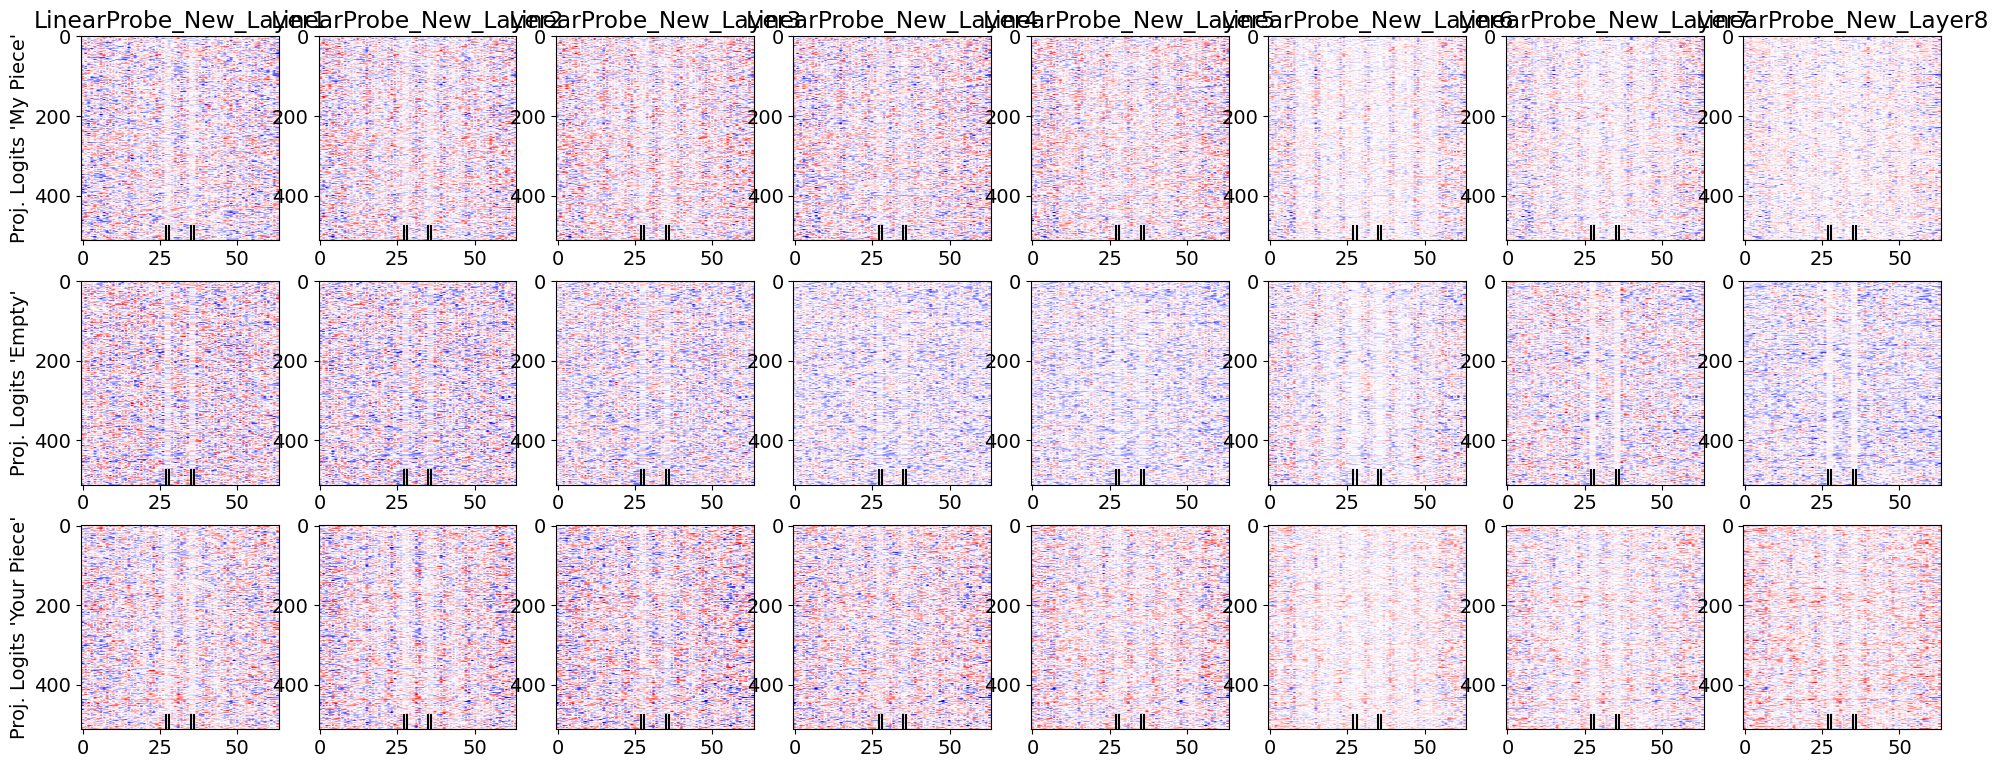

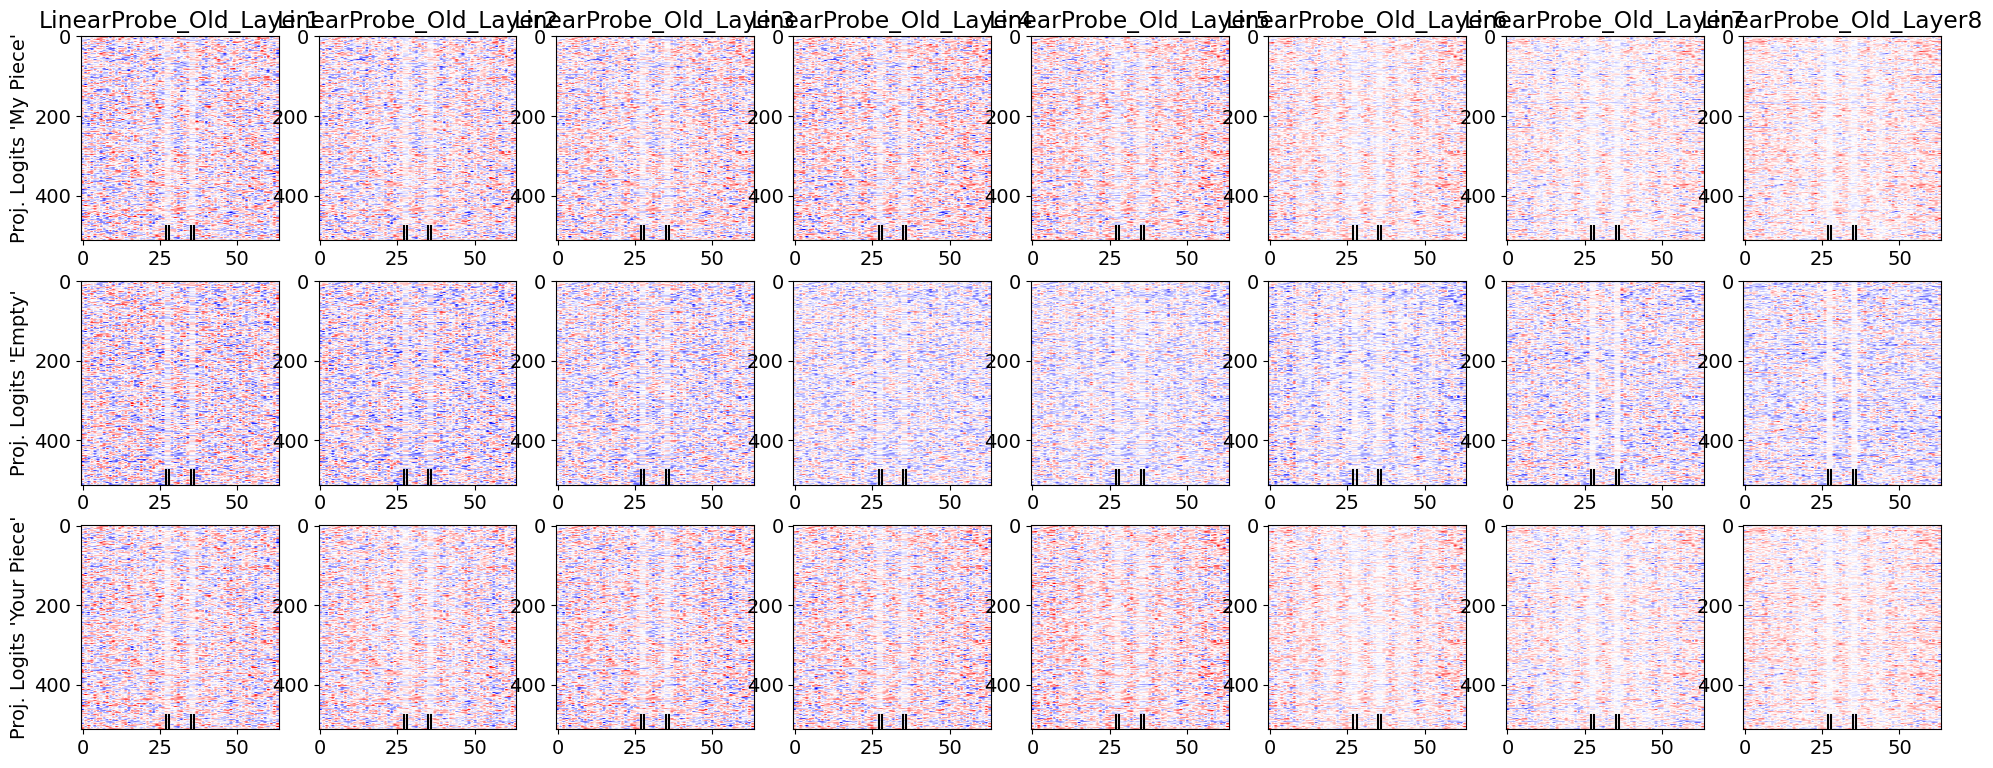

In [14]:
# Visualize the projection matrix for the new probes
starting_tiles = [27, 28, 35, 36]

datapath = "../EWOthello/ckpts/DeanKLi_GPT_Synthetic_8L8H/"
all_files = os.listdir(datapath)
new_board_probes = [file for file in all_files if file.startswith("linearProbe_Map_New")]
old_board_probes = [file for file in all_files if file.startswith("linearProbe_Map_old")]
new_board_probes.sort()
old_board_probes.sort()

n_layers = 8
fig = plt.figure(figsize=(n_layers*3, 9))
ax = plt_utils.addAxis(fig, 3, n_layers)
iter = 0
classification_map = []
for filename in new_board_probes:
    if filename.endswith(".ckpt"):
        data = torch.load(datapath + filename)
        proj_matrix = data["proj.weight"].detach().cpu().T.reshape(-1, 64, 3)
        proj_bias = data["proj.bias"].detach().cpu().reshape(64, 3)
        use_name = f"LinearProbe_New_{filename[-11:-5]}"
        for i in range(3): # Plot each output prob as row
            ax[iter + n_layers*i].imshow(proj_matrix[:,:,i], norm=TwoSlopeNorm(0), cmap="seismic", aspect="auto")
            ax[iter + n_layers*i].set_ylabel("")
            for ref_tile in starting_tiles:
                ax[iter + n_layers*i].plot([ref_tile, ref_tile], [475, 511], 'k-')
        ax[iter].set_title(use_name)
        iter +=1
ax[0].set_ylabel("Proj. Logits 'My Piece'")
ax[n_layers].set_ylabel("Proj. Logits 'Empty'")
ax[2*n_layers].set_ylabel("Proj. Logits 'Your Piece'")


### Repeat the plot for old model
n_layers = 8
fig = plt.figure(figsize=(n_layers*3, 9))
ax = plt_utils.addAxis(fig, 3, n_layers)
iter = 0
classification_map = []
for filename in old_board_probes:
    if filename.endswith(".ckpt"):
        data = torch.load(datapath + filename)
        proj_matrix = data["proj.weight"].detach().cpu().T.reshape(-1, 64, 3)
        proj_bias = data["proj.bias"].detach().cpu().reshape(64, 3)
        use_name = f"LinearProbe_Old_{filename[-11:-5]}"
        for i in range(3): # Plot each output prob as row
            ax[iter + n_layers*i].imshow(proj_matrix[:,:,i], norm=TwoSlopeNorm(0), cmap="seismic", aspect="auto")
            ax[iter + n_layers*i].set_ylabel("")
            for ref_tile in starting_tiles:
                ax[iter + n_layers*i].plot([ref_tile, ref_tile], [475, 511], 'k-')
        ax[iter].set_title(use_name)
        iter +=1
ax[0].set_ylabel("Proj. Logits 'My Piece'")
ax[n_layers].set_ylabel("Proj. Logits 'Empty'")
ax[2*n_layers].set_ylabel("Proj. Logits 'Your Piece'")